In [1]:
#Estimating Weight of Fish from its physical measurements

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, HTML

In [3]:
df = pd.read_csv("./Fish.csv")

In [4]:
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

<p style="color:red; font-size:32px;"><u><i>Understanding our Dataset</i><u></p>

**Total 7 features in our dataset**
* **Species** : Species of the fish, there are 7 unique species in the dataset, namely - Perch, Bream, Roach, Pike, Smelt, Parkki and Whitefish
* **weight** : weight in grams of fish
* **height** : height of fish in cm
* **width** : widht of fish in cm
* **length** : there are 3 type of lengths in the dataset in cm:-

![title](fish.gif)

There are **159** rows in the dataset

There are **no** missing values

There is one categorical feature, named **Species**

In [5]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [6]:
df.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


<p style="color:red; font-size:32px;"><u><i>Visualizing our Dataset</i><u></p>

<AxesSubplot:xlabel='Species', ylabel='count'>

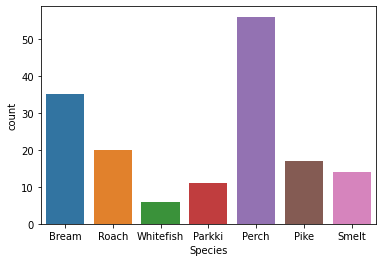

In [8]:
sns.countplot(x="Species", data = df )

<AxesSubplot:>

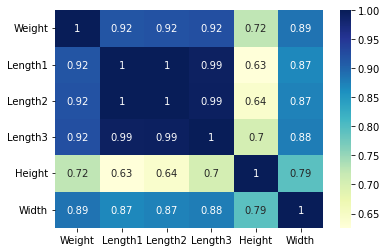

In [9]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

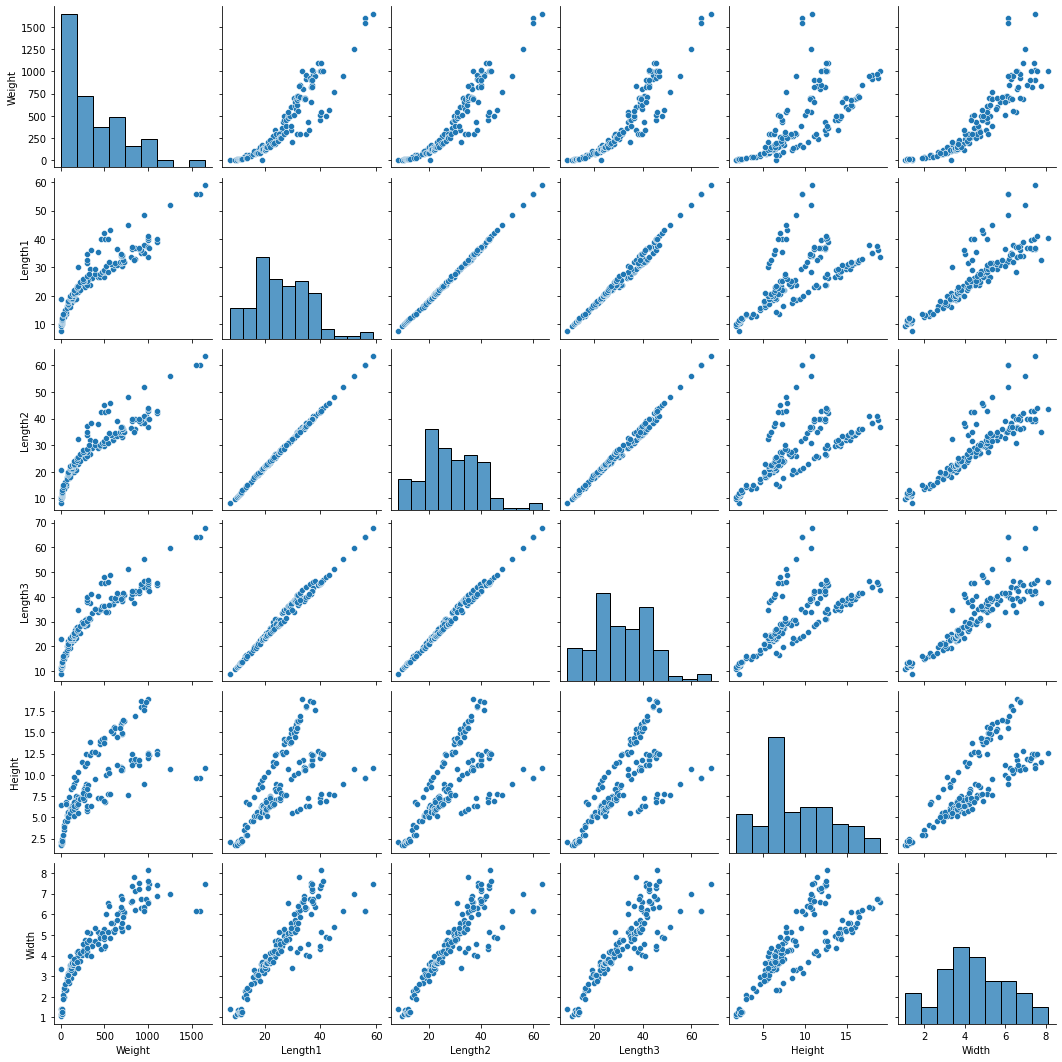

In [10]:
sns.pairplot(df)

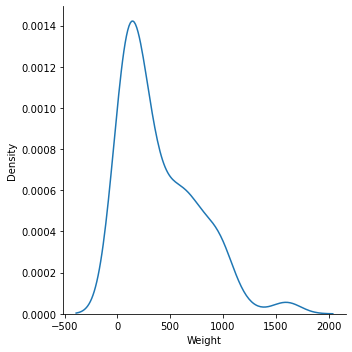

In [11]:
sns.displot(data = df, x = "Weight",  kind="kde")

### Adding Dummies for the categorical variable Species

In [12]:
df = pd.concat([df.drop('Species', axis=1), pd.get_dummies(df['Species'])], axis=1)

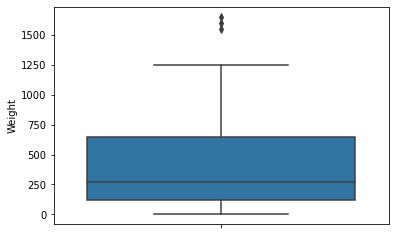

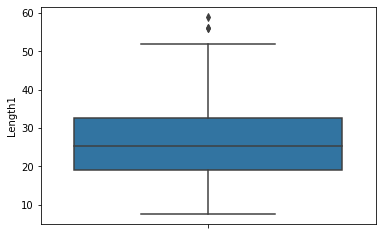

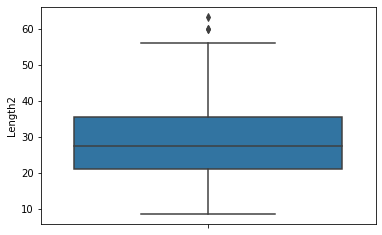

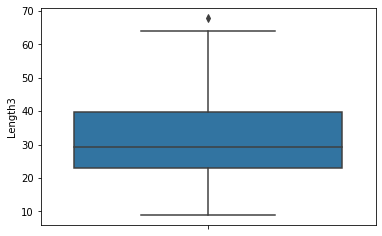

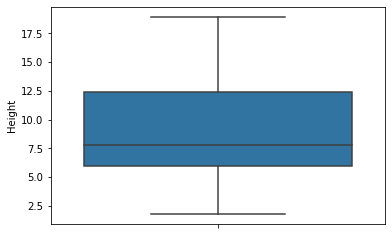

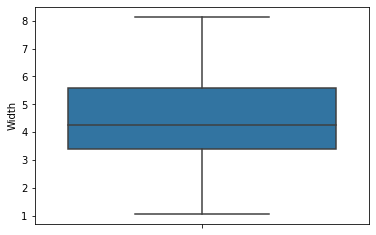

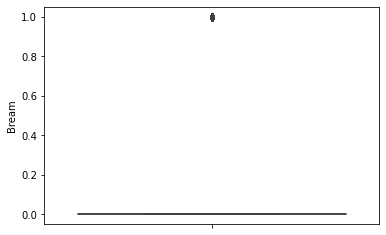

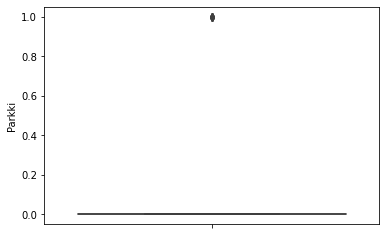

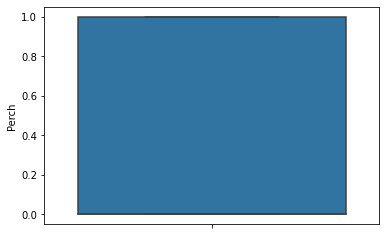

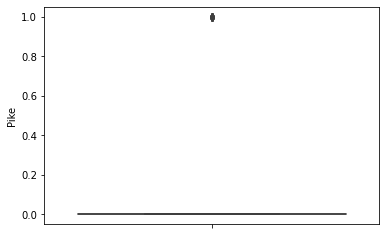

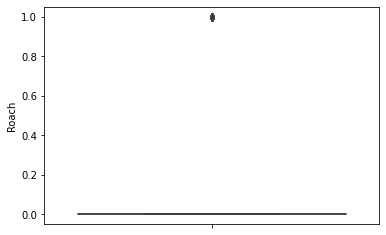

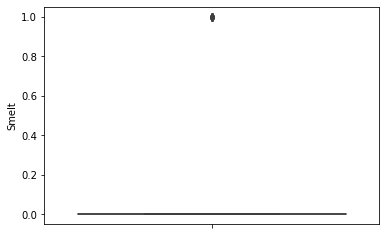

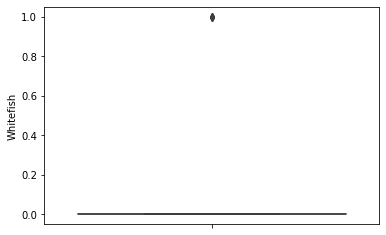

In [13]:
for y in df.columns:
    sns.boxplot(y=y, data = df)
    plt.show()

**Handling Outlier**

In [14]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 2).all(axis=1)] #handling outliers, if not in 95% its an outlier

In [15]:
df

Weight  Length1  Length2  Length3   Height   Width  Bream  Parkki  Perch  \
0     242.0     23.2     25.4     30.0  11.5200  4.0200      1       0      0   
1     290.0     24.0     26.3     31.2  12.4800  4.3056      1       0      0   
2     340.0     23.9     26.5     31.1  12.3778  4.6961      1       0      0   
3     363.0     26.3     29.0     33.5  12.7300  4.4555      1       0      0   
4     430.0     26.5     29.0     34.0  12.4440  5.1340      1       0      0   
..      ...      ...      ...      ...      ...     ...    ...     ...    ...   
122   820.0     37.1     40.0     42.5  11.1350  6.6300      0       0      1   
123  1100.0     39.0     42.0     44.6  12.8002  6.8684      0       0      1   
124  1000.0     39.8     43.0     45.2  11.9328  7.2772      0       0      1   
125  1100.0     40.1     43.0     45.5  12.5125  7.4165      0       0      1   
127  1000.0     41.1     44.0     46.6  12.4888  7.5958      0       0      1   

     Pike  Roach  Smelt  Whitefish  
0       0      0      0          0  
1       0      0      0          0  
2       0      0      0          0  
3       0      0      0          0  
4       0      0      0          0  
..    ...    ...    ...        ...  
122     0      0      0          0  
123     0      0      0          0  
124     0      0      0          0  
125     0      0      0          0  
127     0      0      0          0  

[83 rows x 13 columns]

### StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled)

[[-0.62262724 -0.48601529 -0.47469786 ...  0.          0.
   0.        ]
 [-0.46132652 -0.37415596 -0.35594391 ...  0.          0.
   0.        ]
 [-0.29330495 -0.38813838 -0.32955414 ...  0.          0.
   0.        ]
 ...
 [ 1.92457989  1.83506569  1.84760164 ...  0.          0.
   0.        ]
 [ 2.26062305  1.87701293  1.84760164 ...  0.          0.
   0.        ]
 [ 1.92457989  2.01683709  1.97955047 ...  0.          0.
   0.        ]]


In [17]:
X = df_scaled[:, 1:]
y = df["Weight"]

In [18]:
y

0       242.0
1       290.0
2       340.0
3       363.0
4       430.0
        ...  
122     820.0
123    1100.0
124    1000.0
125    1100.0
127    1000.0
Name: Weight, Length: 83, dtype: float64

<p style="color:red; font-size:32px;"><u><i>Building Model</i><u></p>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [21]:
from sklearn.metrics import r2_score

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(estimator=lin_reg, X = X_train, y = y_train, scoring='r2', cv=10)
print(cross_val_score_train)

[0.94981203 0.90960155 0.92237293 0.86371327 0.96025739 0.87959227
 0.96915261 0.80158803 0.68770971 0.92261176]


In [23]:
cross_val_score_train.mean()

0.8866411556172078

In [24]:
lin_reg.fit(X_train, y_train)

p = lin_reg.predict(X_test)

r2_score(y_test, p)

0.9535125763074134